In [1]:
import torch
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Logistic : Iris

In [4]:
import torch
from torch import nn, optim
from sklearn.datasets import load_iris
iris = load_iris()

In [5]:
X = iris.data[:100]
y = iris.target[:100]

In [7]:
X = torch.tensor(X, dtype = torch.float32)
y = torch.tensor(y, dtype = torch.float32)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  """Entry point for launching an IPython kernel.


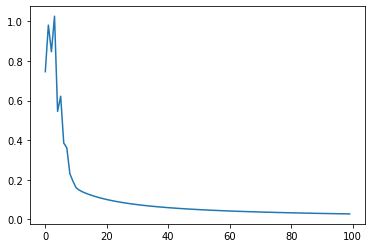

In [12]:
net = nn.Linear(4,1)
loss_fn = nn.BCEWithLogitsLoss()
optimizer = optim.SGD(net.parameters(), lr = 0.25)
losses = []
for epoch in range(100): 
    pred = net(X) 
    loss = loss_fn(pred.view_as(y),y)
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()
    losses.append(loss.item())

%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(losses)

# digit datast

In [19]:
from sklearn.datasets import load_digits

In [21]:
digit = load_digits()

In [52]:
x = digit.data
y = digit.target

In [53]:
x = torch.tensor(x,dtype = torch.float32)
y = torch.tensor(y,dtype = torch.int64)

In [54]:
model = nn.Linear(x.size()[1],10)

In [55]:
loss_fn = nn.CrossEntropyLoss()

In [56]:
optimizer = optim.SGD(model.parameters(),lr = 0.01)

In [59]:
losses = [] 
for epoch in range(100) :
    pred = model(x)
    loss = loss_fn(pred,y) 
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()
    losses.append(loss.item())

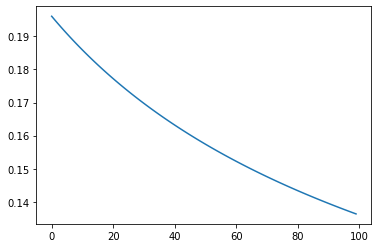

In [60]:
plt.plot(losses)

In [46]:
from sklearn.datasets import load_digits
digits = load_digits()

X = digits.data
y = digits.target

X = torch.tensor(X, dtype=torch.float32)
# CrossEntropyLoss함수는 y로 int64형의 Tensor를 받으지 주의하자を受け取るので注意
y = torch.tensor(y, dtype=torch.int64)

# 출력은 10(클래스 수) 차원
net = nn.Linear(X.size()[1], 10)

# 소프트맥스 크로스 엔트로피
loss_fn = nn.CrossEntropyLoss()

# SGD
optimizer = optim.SGD(net.parameters(), lr=0.01)
# 손실 함수 로그
losses = []

# 100회 반복
for epoc in range(100):
     # 전회의 backward 메서드로 계산된 경사 값을 초기화
    optimizer.zero_grad()
    
    # 선형 모델으로 y 예측 값을 계산
    y_pred = net(X)
    
    # MSE loss 미분 계산
    loss = loss_fn(y_pred, y)
    loss.backward()
    
    # 경사를 갱신한다
    optimizer.step()
    
    # 수렴 확인을 위한 loss를 기록해둔다
    losses.append(loss.item())